In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('houses_dataset.csv')

# handling missing value

In [4]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

# Build a linear model

In [5]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)

## Fit Linear Model

In [7]:
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

# Evaluate the performance and visualize results

In [8]:
print("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8627547060335301


# Predict in testing data

In [9]:
predictions = model.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.023390905304161397


# visualize

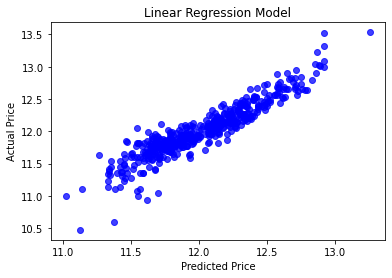

In [11]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()